[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


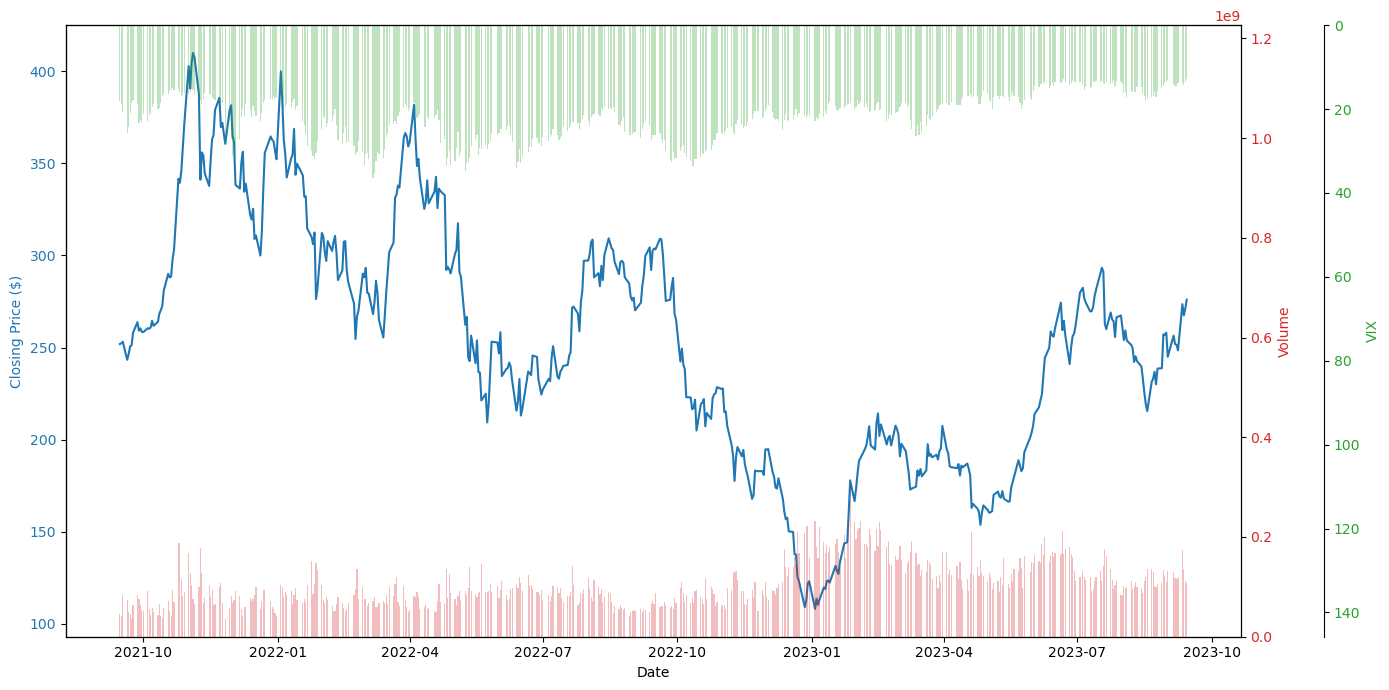

In [38]:
import yfinance as yf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt


end = dt.datetime.now()
start = end - dt.timedelta(days=365*2)  # for 2 years of data

data = yf.download("TSLA", start=start, end=end)
# print(data)
data_vix = yf.download("^VIX", start=start, end=end)

# plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the closing prices on ax1
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price ($)', color=color)
ax1.plot(data['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the volume data
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Volume', color=color)
ax2.set_ylim([0, data['Volume'].max()*4])
ax2.bar(data.index, data['Volume'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for the VIX data
ax3 = ax1.twinx()
color = 'tab:green'
# Offset the VIX scale to align it at the top of the graph
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('VIX', color=color)
ax3.set_ylim([0, data_vix['Close'].max()*4])
ax3.bar(data_vix.index, data_vix['Close'], color=color, alpha=0.3)
ax3.tick_params(axis='y', labelcolor=color)
# Invert the y-axis of the VIX data
ax3.invert_yaxis()

fig.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


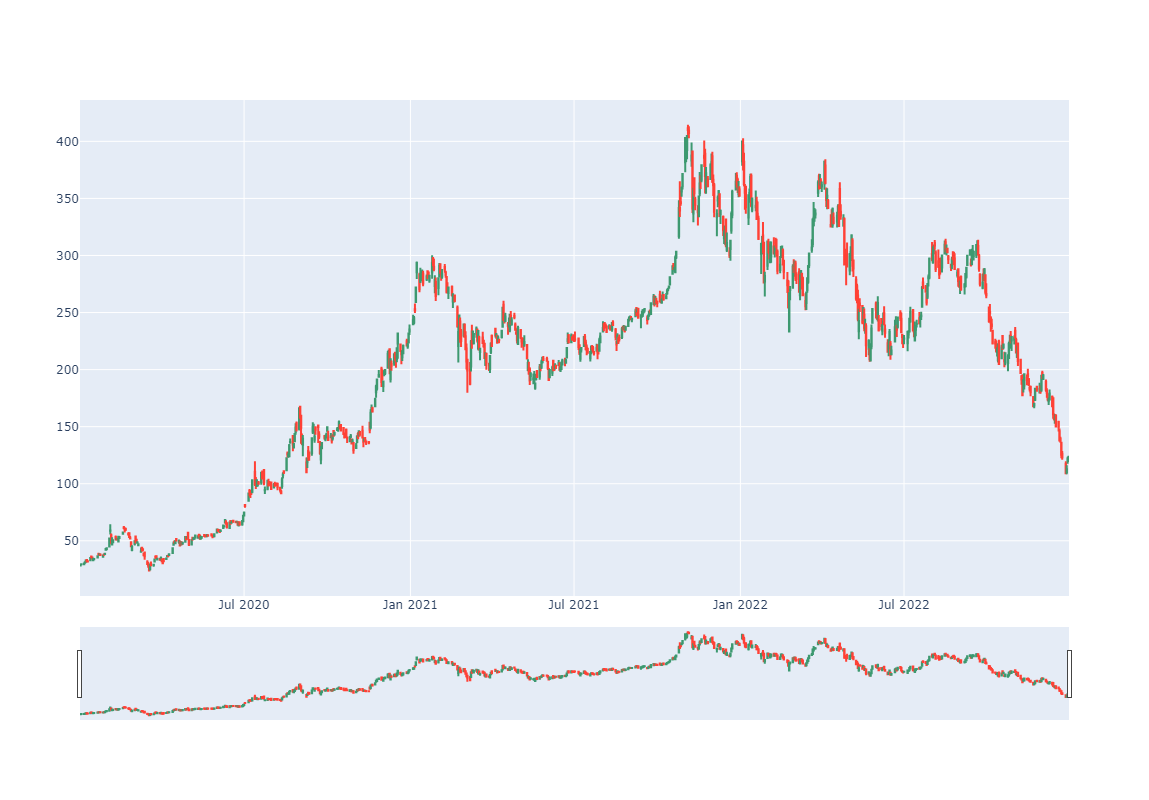

In [40]:
import yfinance as yf
import plotly.graph_objects as go

# Download historical data
data = yf.download('TSLA', start='2020-01-01', end='2022-12-31')

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])

# Adjust the size of the figure
fig.update_layout(autosize=False, width=1000, height=800)

fig.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


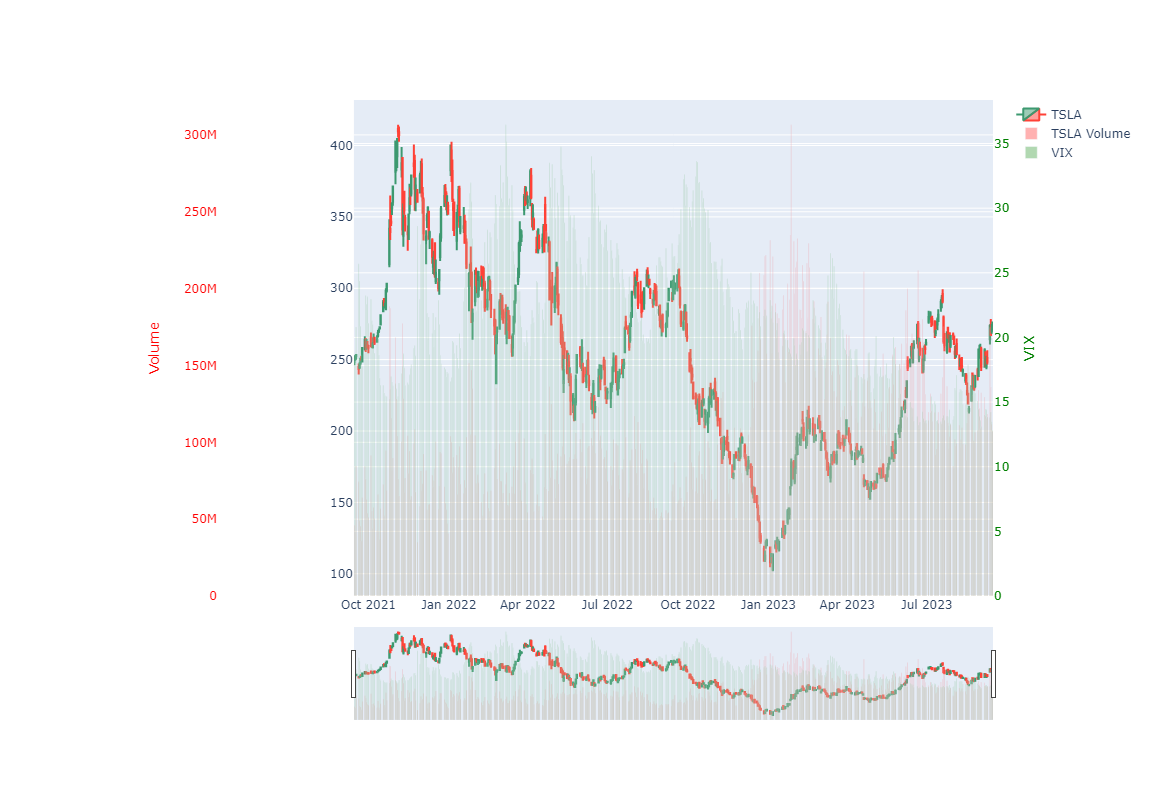

In [53]:
import yfinance as yf
import datetime as dt
import pandas as pd
import plotly.graph_objects as go

end = dt.datetime.now()
start = end - dt.timedelta(days=365*2)  # for 2 years of data

data = yf.download("TSLA", start=start, end=end)
data_vix = yf.download("^VIX", start=start, end=end)

# Create a new figure
fig = go.Figure()

# Add the candlestick chart for TSLA to the figure
fig.add_trace(go.Candlestick(x=data.index,
                             open=data['Open'],
                             high=data['High'],
                             low=data['Low'],
                             close=data['Close'],
                             name='TSLA'))

# Add the volume data to the figure as a bar chart
fig.add_trace(go.Bar(x=data.index, y=data['Volume'], name='TSLA Volume', marker_color='red', opacity=0.3, yaxis='y2'))

# Add the VIX data to the figure as a bar chart
fig.add_trace(go.Bar(x=data_vix.index, y=data_vix['Close'], name='VIX', marker_color='green', opacity=0.3, yaxis='y3'))

# Set up the layout for the secondary and tertiary y-axes
fig.update_layout(
    xaxis=dict(domain=[0.3, 1]),
    yaxis2=dict(title='Volume', titlefont=dict(color='red'), tickfont=dict(color='red'), anchor="free", overlaying="y", side="left", position=0.15),
    yaxis3=dict(title='VIX', titlefont=dict(color='green'), tickfont=dict(color='green'), anchor="x", overlaying="y", side="right"),
    autosize=False,
    width=1000,
    height=800,
)

# Invert the y-axis of the VIX data
# fig.update_yaxes(autorange="reversed")

fig.show()
